In [17]:

import matplotlib.pyplot as plt
import os


def get_all_results(results_folder_path):
    """
    Retrieves all the results from the specified folder.

    Args:
        results_folder_path (str): The path to the folder containing the results.

    Returns:
        dict: A dictionary containing the results, where the keys are the file names and the values are dictionaries
              containing the economic and social values.
    """
    values_dict = {}

    for filename in os.listdir(results_folder_path):
        file_path = os.path.join(results_folder_path, filename)
        if os.path.isfile(file_path):
            with open(file_path, "r", encoding="utf-8") as file:
                content = file.read()
                economic_value = float(content.split("\n")[0].split(": ")[1])
                social_value = float(content.split("\n")[1].split(": ")[1])
                values_dict[filename] = {
                    "economic": economic_value,
                    "social": social_value,
                }

    return values_dict


def extract_economic_scores(dict):
    """
    Extracts the economic scores from a dictionary.

    Parameters:
    dict (dict): A dictionary containing economic scores for different keys.

    Returns:
    dict: A new dictionary containing only the economic scores.

    """
    economic_scores = {key: dict[key]['economic'] for key in dict}
    return economic_scores


def extract_social_scores(dict):
    """
    Extracts the social scores from a dictionary.

    Parameters:
    dict (dict): A dictionary containing social scores for different keys.

    Returns:
    dict: A new dictionary containing only the social scores.

    """
    social_scores = {key: dict[key]['social'] for key in dict}
    return social_scores

In [12]:

pct_result_path = os.path.join(os.getcwd(), "pct-assets", "results")

values_dict = get_all_results(pct_result_path)

# just grab the keys with ef and ih

keys_with_ef_or_ih = [
    key for key in values_dict.keys() if ('EF' in key or 'IH' in key)]

# group by corpora

corpora_list = ["auth_left", "auth_right", "lib_left", "lib_right", "4chan"]

corpora_dict = {}

for key in keys_with_ef_or_ih:
    for corpora in corpora_list:
        if corpora in key:
            if corpora not in corpora_dict:
                corpora_dict[corpora] = []
            corpora_dict[corpora].append(key)

# group by model

model_list = ["gpt3.5", "llama_70b"]

model_dict = {}

for key in keys_with_ef_or_ih:
    for model in model_list:
        if model in key:
            if model not in model_dict:
                model_dict[model] = []
            model_dict[model].append(key)

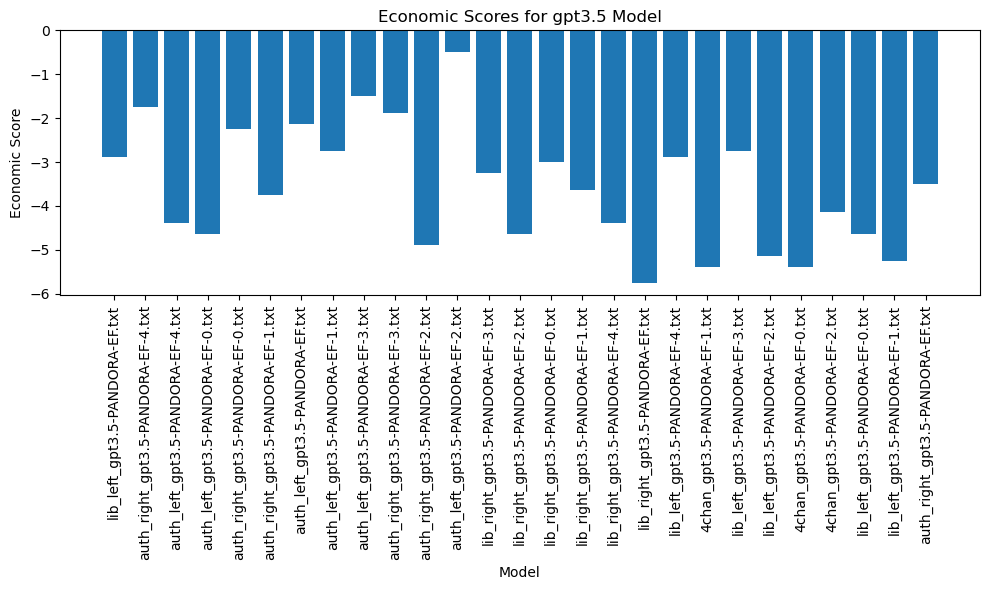

In [22]:
economic = extract_economic_scores(values_dict)
economic_gpt3_5 = {key: economic[key] for key in economic.keys() if key in model_dict['gpt3.5']}
economic_gpt3_5_averaged = sum(economic_gpt3_5.values()) / len(economic_gpt3_5)

import matplotlib.pyplot as plt

# Extract the model names and scores
model_names = list(economic_gpt3_5.keys())
scores = list(economic_gpt3_5.values())

# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, scores)
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Economic Score')
plt.title('Economic Scores for gpt3.5 Model')
plt.tight_layout()
plt.show()